Testing notebook

In [5]:
import numpy as np
import keras
from matplotlib import pyplot as plt 

from DataLoading import load_masks_csv, read_image, get_mask

Cosntants

In [6]:
CSV_PATH = "/home/slava/dev/ShipDetection/train_ship_segmentations_v2.csv"
IMAGES_PATH = "/home/slava/dev/ShipDetection/train_v2"
MODEL_FILE = "./checkpoint768.keras"
IMAGE_NAME = "00a52cd2a.jpg"

Get Data

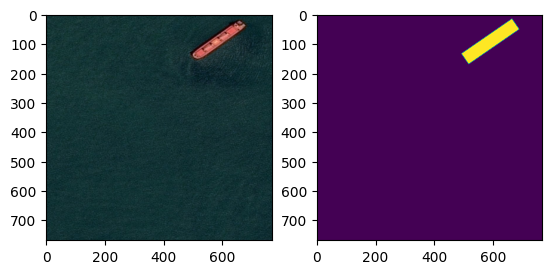

In [13]:
model = keras.models.load_model(MODEL_FILE)
mask_data = load_masks_csv(CSV_PATH)
input_image = read_image(IMAGES_PATH, IMAGE_NAME)
mask = get_mask(mask_data, IMAGE_NAME)

plt.subplot(1, 2, 1)
plt.imshow(input_image)
plt.subplot(1, 2, 2)
plt.imshow(mask)
plt.show()

Predict

In [14]:
predicted_mask = model.predict(np.expand_dims(input_image, axis=0))

2023-12-18 22:00:31.087321: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:454] Loaded cuDNN version 8906
2023-12-18 22:00:31.215000: I external/local_tsl/tsl/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory


1/1 [==============================] - 3s 3s/step


2023-12-18 22:00:33.211671: I external/local_tsl/tsl/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory


Show predicted image

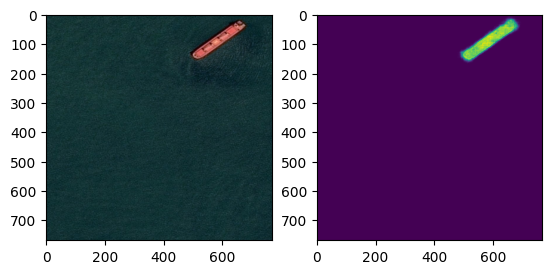

In [17]:
predicted_mask_uint8 = (predicted_mask[0] * 255).astype(np.uint8)
plt.subplot(1, 2, 1)
plt.imshow(input_image)
plt.subplot(1, 2, 2)
plt.imshow(predicted_mask_uint8)
plt.show()